In [2]:
import numpy as np
from math import sqrt
from random import random as uniform
from matplotlib import pyplot as plt
from scipy import stats
from collections import defaultdict
%matplotlib inline

In [14]:
def plot_avg(f, n, trials, show_normal=False, ul=1):
    bin_resolution = 2
    x = list(map(lambda v: round(v, bin_resolution), np.linspace(0,ul,10**bin_resolution+1)))
    hist = dict(zip(x,np.zeros(10**bin_resolution+1)))
    hist = defaultdict(float,hist)
    for j in range(trials):
        y = 0.0
        for i in range(n):
            y += f()
        y /= n
        hist[round(y, bin_resolution)] +=1.0/trials
    plt.plot(list(hist.keys()), list(hist.values()))
    if show_normal:
        mean = sum([p*v for v,p in hist.items()])
        std = sqrt(sum([p*(v-mean)**2 for v,p in hist.items()]))
        print("Mean = {m}, STD={s}".format(m=round(mean, 2),s=round(std, 2)))
        y = stats.norm.pdf(x,mean,std)
        y = y/y.sum()
        plt.plot(x,y)
    plt.xlim((0,ul))
    #plt.ylim((0,0.2))
    plt.xlabel("dollar")
    plt.ylabel("probability")

## Plotting convergence to a Gaussian

Mean = 0.5, STD=0.05


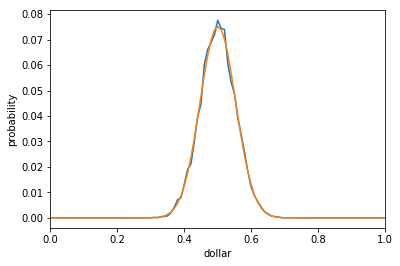

In [4]:
plot_avg(uniform, n=30, trials=10000, show_normal=True)

Text(0,0.5,'probability')

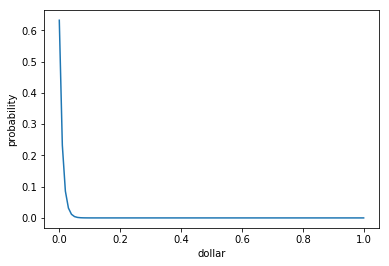

In [5]:
x = np.linspace(0,1,101)
l=100
y =l* np.exp(-l*x)
y = y/y.sum()
plt.plot(x,y)
plt.xlabel("dollar")
plt.ylabel("probability")

$$\lambda=100$$
$$f(x)=\lambda e^{-\lambda x}$$

In [6]:
def exp(l):
    return lambda: l*np.exp(-l* uniform())

Mean = 1.0, STD=0.22


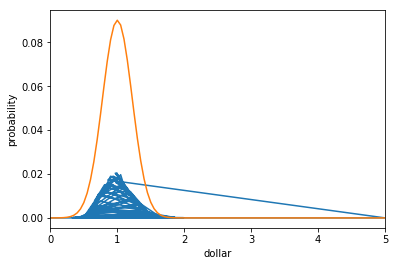

In [16]:
plot_avg(exp(100), n=1000, trials=10000, show_normal=True, ul=5)

## Conjugate Prior

$$revenue = P(skip|impression) * 0 + P(click| impression) * P(cost | click)$$
$$revenue = (1-ctr) * 0 + ctr * cpc $$

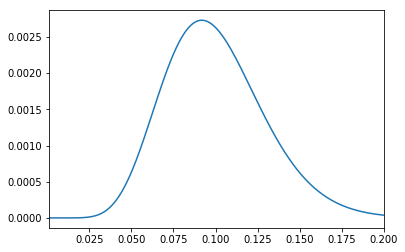

In [197]:
from conjugate_prior import BetaBinomial
A_CTR = 1/10
ctr_model = BetaBinomial(A_CTR)
ctr_model.plot(0.001,0.2)

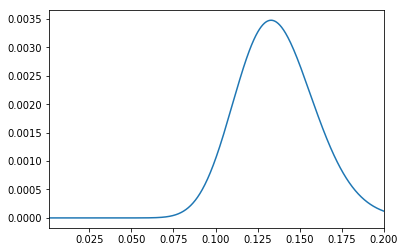

In [198]:
ctr_model = ctr_model.update(20,100)
ctr_model.plot(0.001,0.2)

In [199]:
acceptable_err = 0.001
ctr_model.posterior(A_CTR-acceptable_err,A_CTR+acceptable_err)

0.010367459618252611

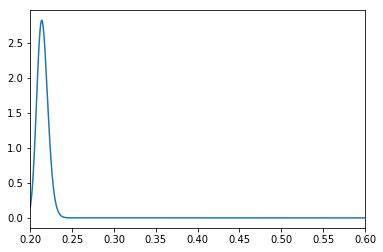

In [31]:
from conjugate_prior import GammaExponential
cpc_model = GammaExponential(alpha=200, beta=100)
cpc_model.plot_inverse_lambda(0.2,0.6)

## pymc3

In [6]:
prior_mean = 0.2
prior_confidence = 0.1
actual_data = [0.1,0.2,0.3]

In [7]:
import pymc3 as pm
with pm.Model() as model:
    decay_rate = pm.Normal("decay",1/prior_mean,
                           sd=prior_confidence)
    bid = pm.Exponential("bid", decay_rate,
                         observed=actual_data)
    model_trace = pm.sample(1000)

/usr/local/lib/python3.6/site-packages/pymc3/distributions/continuous.py:68: UserWarning: The variable specified for lam has negative support for Exponential, likely making it unsuitable for this parameter.
  warnings.warn(msg)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 1500/1500 [00:01<00:00, 1379.26it/s]


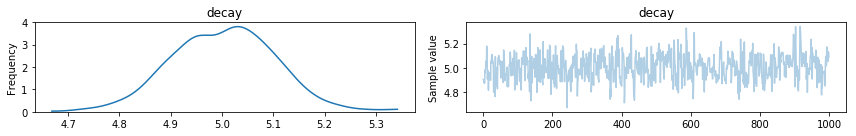

In [8]:
pm.traceplot(model_trace, varnames=['decay']);